In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'/home/nicolasipr/Documents/Programming/Self/thesis/wann/brain-tokyo-workshop/WANNRelease/WANN/log'

In [3]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: maximum fitness
3: top fitness (best fitness ever)
4: peak fitness (fitness earned with best single weight value by max individual)
5: median # of nodes in population
6: median # of connections in population]
"""
stats = np.loadtxt('test_stats_aws.out', delimiter=',')
runTime = np.loadtxt('sample_runTime.out', delimiter=',')

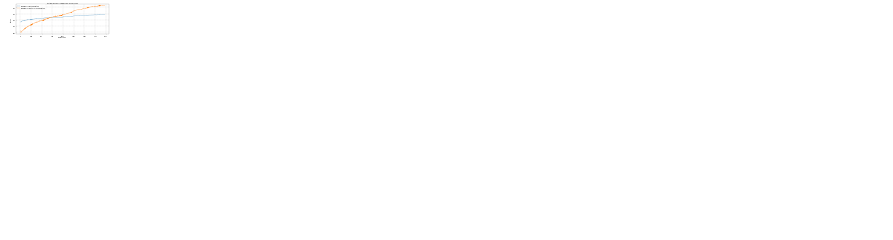

In [4]:
# Plot fitness progress:
plt.figure(figsize=(12,4), dpi=10)
plt.grid(linestyle='--', linewidth=0.1)
# plt.plot(stats[:,1], label="Median Fitness")
# plt.plot(stats[:,2], label="Max Fitness")
# plt.plot(stats[:,3], label="Top Fitness")
# plt.plot(stats[:,4], label="Peak Fitness")
plt.plot(stats[:,5], label="Median Nodes Population")
plt.plot(stats[:,6], label="Median Connections in Population")
plt.legend()
plt.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations')
plt.ylabel('Fitness')

# Approximate time on 8 cores
genKey = np.array([32,128,256,384,640,896],dtype=int)

for i in range(len(genKey)):
  gen = int(genKey[i]/8)-1
  time = runTime[gen]/3600
  plt.annotate(str(round(time,1))+' hours', xy=(gen*8,0), xytext=(gen*8,-200),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('WANN MNIST numbers on 32 core VM')

plt.savefig(fname='04_wann_run_mnist_gen_aws.png', format='png', dpi=300, quality=100)

In [5]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import vis as nv
nv.viewInd('log/test_best.out','mnist256')

ImportError: No module named 'vis'